In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
sc = SparkContext("local[2]", "TwitterTrend")
ssc = StreamingContext(sc, 1)
sqlContext = SQLContext(sc)


In [3]:
socket_stream = ssc.socketTextStream("localhost", 5555)

In [4]:
lines = socket_stream.window( 20 )


from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )


( lines.flatMap( lambda text: text.split( " " ) )
  .filter( lambda word: word.lower().startswith("#") )
  .map( lambda word: ( word.lower(), 1 ) )
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
              .limit(10).registerTempTable("tweets") ) )

In [5]:


ssc.start() 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

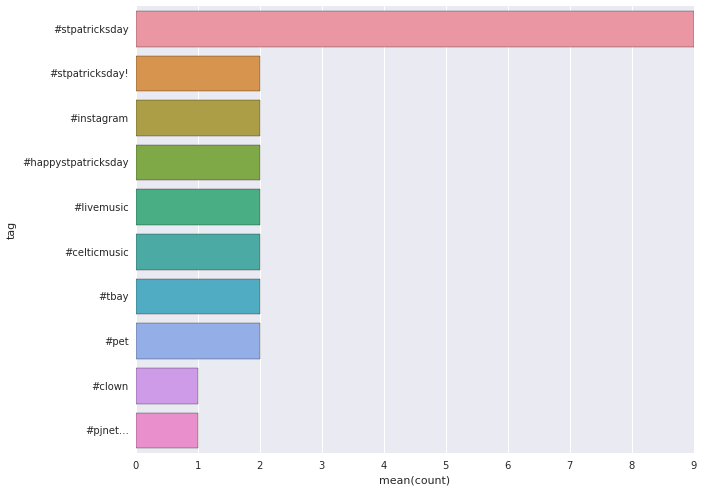

KeyboardInterrupt: 

In [9]:
import time
from IPython import display


for i in range(0,1000):
#   time.sleep( 2 )
  top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
  top_10_df = top_10_tweets.toPandas()
  display.clear_output(wait=True)
  sn.plt.figure( figsize = ( 10, 8 ) )
  sn.barplot( x="count", y="tag", data=top_10_df)
  sn.plt.show()


In [ ]:
sc.stop()


ssc.stop()